# Quantization Noise

## Plotting Uniform Distribution

In [112]:
import numpy as np
import matplotlib.pyplot as plt

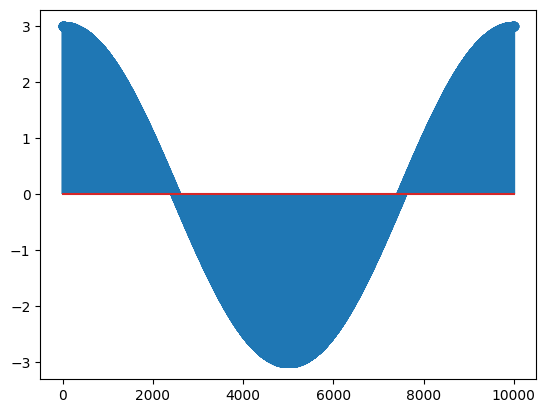

In [171]:
N = 10000
mi = 0
sigma = 1
# x = np.random.normal(mi, sigma, N)
# x = np.linspace(-10, 10, N)
x = 3*np.cos(np.linspace(0, 2 * np.pi, N))

plt.stem(x)
plt.show()

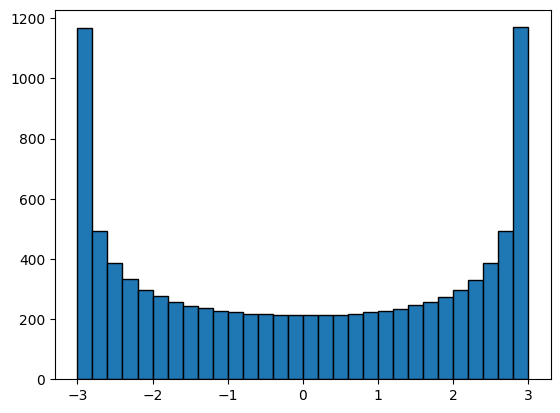

In [172]:
plt.hist(x, bins=30, edgecolor='black', titlte='Histograma ')
plt.show()

In [177]:
def quantize_signal(x, bits):
    x_ = np.copy(x)
    bits_array = np.zeros_like(x)
    signal_range = np.max(x) - np.min(x)
    step = signal_range / 2**bits
    half_step = step / 2

    minimo = np.min(x)

    N = int(len(x))
    for i in range(N):
        bits_array[i] = min((x[i] - minimo) // step, 2**bits - 1)
        x_[i] = bits_array[i] * step + np.min(x) + half_step


    return x_, bits


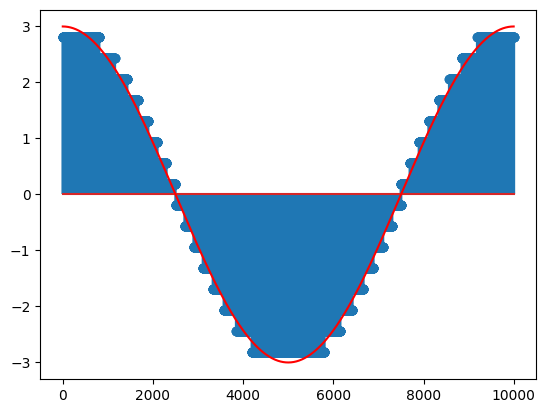

In [178]:
x_2bits, _ = quantize_signal(x, 2)
x_4bits, _ = quantize_signal(x, 4)
# plt.stem(x_2bits)
plt.stem(x_4bits)
# plt.stem(x_4bits, linefmt='r-')
plt.plot(x, color='red')
plt.show()

0.00029992596316117217


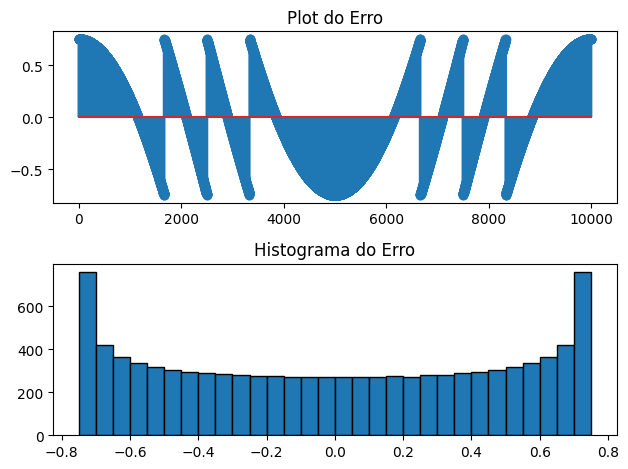

In [193]:
error = x - x_2bits
print(np.mean(error))

plt.subplot(211)
plt.title('Plot do Erro')
plt.stem(error)
plt.subplot(212)
plt.title('Histograma do Erro')
plt.hist(error, bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

## Plots das DEPs (Densidades Espectrais de Potência)

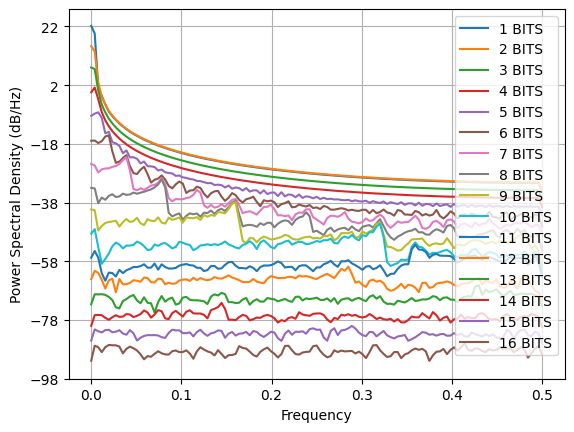

In [194]:
e_4bits = x - x_4bits

# plt.psd(x, Fs=1, label='Original')
# plt.psd(error, Fs=1, NFFT=N, label='Error')
# plt.psd(e_4bits, Fs=1, NFFT=N, label='Quantized 4 BITS')
for i in range(1, 17):
    error = x - quantize_signal(x, i)[0]
    plt.psd(error, Fs=1, label=f'{i} BITS')
plt.legend(loc='upper right')
plt.show()  